In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/var/folders/1m/71syl3xd3910y8gqrq29f4w40000gn/T/ipykernel_10286/1654069430.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = 'Datasets/Air and Sea Travel Statistics/ASA01.csv'

df = pd.read_csv(data)
df

,STATISTIC Label,Year,Direction,Mode,UNIT,VALUE
0,Air and Sea Travel,2010,Arrivals,All modes of transport,Thousand,12902.2
1,Air and Sea Travel,2010,Arrivals,Air,Thousand,11400.6
2,Air and Sea Travel,2010,Arrivals,Sea,Thousand,1501.7
3,Air and Sea Travel,2010,Departures,All modes of transport,Thousand,12920.2
4,Air and Sea Travel,2010,Departures,Air,Thousand,11425.3
...,...,...,...,...,...,...
79,Air and Sea Travel,2023,Arrivals,Air,Thousand,19481.0
80,Air and Sea Travel,2023,Arrivals,Sea,Thousand,1144.6
81,Air and Sea Travel,2023,Departures,All modes of transport,Thousand,20626.2
82,Air and Sea Travel,2023,Departures,Air,Thousand,19476.1


In [4]:
# Renaming columns
df_renamed = df.replace({
    'All modes of transport': 'Total',
    'Arrivals Total': 'Arrivals Total',
    'Departures Total': 'Departures Total'
})

# Applying pivot_table function on dataframe to put 'VALUE' into new labeled columns [DIRECTION]+[Mode]'
df_pivoted = df_renamed.pivot_table(index='Year', columns=['Direction', 'Mode'], values='VALUE')

# Rename columns joining Direction with Mode names and sorting in alphabetical order
df_pivoted.columns = [' '.join(col).strip() for col in df_pivoted.columns.values]
df_pivoted = df_pivoted.reindex(sorted(df_pivoted.columns), axis=1)

# Reset index to make 'Year' a column and not an index label
df_pivoted.reset_index(inplace=True)

# Show the DataFrame
df_pivoted


,Year,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
0,2010,11400.6,1501.7,12902.2,11425.3,1494.9,12920.2
1,2011,11647.5,1402.2,13049.7,11707.1,1402.5,13109.7
2,2012,11806.7,1335.3,13142.0,11839.7,1321.9,13161.6
3,2013,12287.7,1345.2,13632.9,12314.5,1340.7,13655.2
4,2014,13138.8,1408.0,14546.8,13169.5,1401.0,14570.5
5,2015,14744.6,1355.6,16100.3,14790.4,1348.1,16138.5
6,2016,16232.4,1300.2,17532.6,16318.9,1289.2,17608.1
7,2017,17076.0,1323.3,18399.4,17139.8,1309.0,18448.8
8,2018,18102.2,1293.7,19395.9,18180.6,1275.7,19456.3
9,2019,18907.5,1236.2,20143.7,18975.1,1230.3,20205.3


In [5]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              14 non-null     int64  
 1   Arrivals Air      14 non-null     float64
 2   Arrivals Sea      14 non-null     float64
 3   Arrivals Total    14 non-null     float64
 4   Departures Air    14 non-null     float64
 5   Departures Sea    14 non-null     float64
 6   Departures Total  14 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 912.0 bytes


In [10]:
# calculating the mean of each column excluding Year
Mean_df = df_pivoted.median().drop(['Year'])

print("\nMean measurements for each column:")
Mean_df


Mean measurements for each column:


Arrivals Air        13941.70
Arrivals Sea         1311.75
Arrivals Total      15323.55
Departures Air      13979.95
Departures Sea       1299.10
Departures Total    15354.50
dtype: float64

In [7]:
df_described_no_year = df_pivoted.drop(columns=['Year']).describe()
df_described_no_year
df_pivoted.describe()

,Year,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2016.5000,13547.892857,1176.685714,14724.585714,13580.607143,1172.778571,14753.378571
std,4.1833,4771.033748,354.452974,5010.327735,4779.974977,345.456430,5011.889370
min,2010.0000,4135.700000,324.500000,4460.200000,4114.700000,338.000000,4452.600000
25%,2013.2500,11687.300000,1167.500000,13072.775000,11740.250000,1170.150000,13122.675000
50%,2016.5000,13941.700000,1311.750000,15323.550000,13979.950000,1299.100000,15354.500000
75%,2019.7500,16865.100000,1353.000000,18182.700000,16934.575000,1346.250000,18238.625000
max,2023.0000,19481.000000,1501.700000,20625.600000,19476.100000,1494.900000,20626.200000


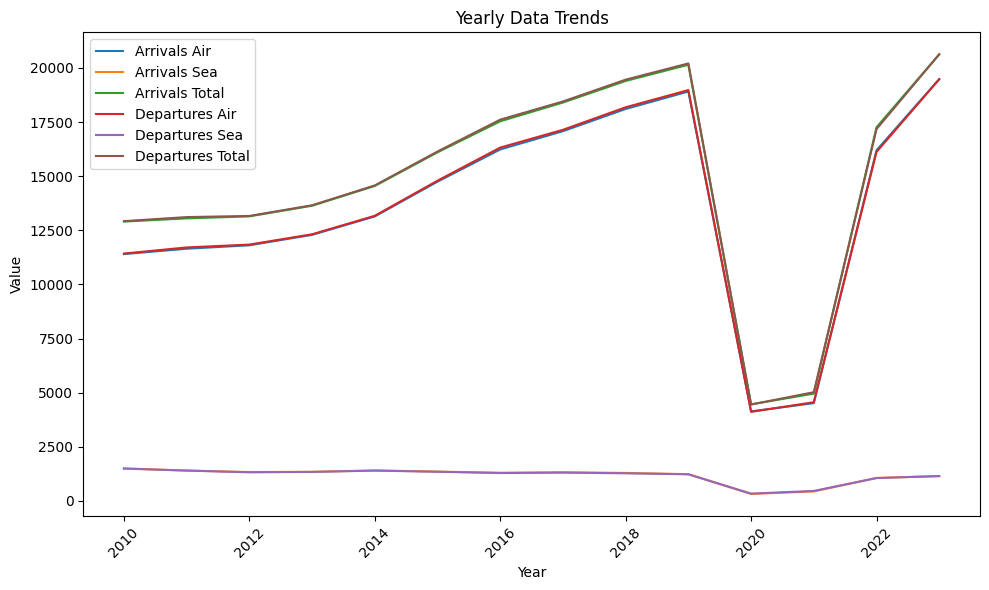

In [8]:
x = df_pivoted['Year']
plt.figure(figsize=(10, 6))  

# Plotting each column against 'Year'
for column in df_pivoted.columns[1:]:  # Excluding 'Year' column for the x-axis
    plt.plot(x, df_pivoted[column], label=column)

plt.title('Yearly Data Trends')  # Add a title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Value')  # Label for the y-axis
plt.legend()  # Show legend to identify lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off elements
plt.show()